In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import risktools as rt
from loader import _load_json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
up = {"m*": {"user": "", "pass": ""}, "eia": "", "quandl": ""}

up["eia"] = os.getenv("EIA")
up["quandl"] = os.getenv("QUANDL")
up["m*"]["pass"] = os.getenv("MS_PASS")
up["m*"]["user"] = os.getenv("MS_USER")


In [194]:
mvgbm = rt.MVGBM(
    s0=[100,100,100], 
    r=0.0, 
    sigma=[.2,.2,.2], 
    T=0.25, 
    dt=1/252, 
    cor=[[1,0.5,0.5],[0.5,1,0.5],[0.5,0.5,1]],
    asset_names=['A','B','C']
    )
mvgbm.fit()
mvgbm.simulate()
mvgbm.plot_efficient_frontier(strike=100)

In [198]:
i = np.random.randint(0,1000)
print(i)
prices = pd.DataFrame(mvgbm.sims[:,i,:])
prices

535


,0,1,2
0,100.000000,100.000000,100.000000
1,99.106656,99.993373,100.008829
2,97.417933,99.315681,99.001297
3,99.463276,100.735457,101.263339
4,98.920013,99.767961,101.511350
...,...,...,...
59,96.081601,86.520584,97.374386
60,95.022454,86.398088,96.714292
61,96.777025,87.026171,96.237111
62,95.755963,85.938957,94.827573


In [199]:
returns = np.log(prices) - np.log(prices).shift(1)

In [200]:
returns.dropna().std()*np.sqrt(252)

0    0.212464
1    0.194341
2    0.199621
dtype: float64

In [188]:
mvgbm2 = rt.MVGBM(
    r=0.0, 
    T=0.25, 
    dt=1/252, 
    prices=prices
    )
mvgbm2.fit()
mvgbm2._s0=[100,100,100]
mvgbm2.simulate()
mvgbm2.plot_efficient_frontier(strike=100, portfolio_sims=10000)

<AxesSubplot:>

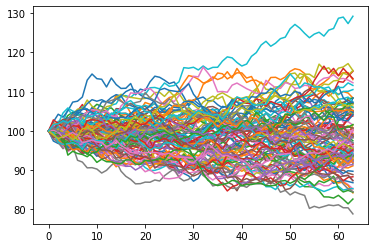

In [186]:
pd.DataFrame(mvgbm2.sims[:,:,0]).iloc[:,:100].plot(legend=False)

In [149]:
mvgbm2._sigma

0    1.929621
1    1.922125
2    2.027893
dtype: float64

In [150]:
mvgbm2._cor

,0,1,2
0,1.000000,0.540171,0.385711
1,0.540171,1.000000,0.491805
2,0.385711,0.491805,1.000000
